#**Tugas 1**
##**Eksplorasi Hyperparameter CNN dengan menggunakan dataset Cifar10**
Referensi dasar menggunakan materi MIT dengan judul introduction to deep learning dengan perubahan dalam ekspolorasi dataset, hyperparameter dan visualisasi data hasil analisis dan prediksi


In [2]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf
import os

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
!pip install pyyaml h5py
# melakukan pegecekan GPU jika tidak terdeteksi maka akan dilakukan perubahan runtime
assert len(tf.config.list_physical_devices('GPU')) > 0

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.6.1-py3-none-any.whl size=2118512 sha256=b81a85233aa8d4cdc97914751faf5309104e2d8a506e8aad896006cd62c4d126
  Stored in directory: /root/.cache/pip/wheels/a1/67/db/909c55e80ce7fc2a8dbe1bbff0e591a69d12d11136b4cfe34c
Successfully built mitdeeplearning


**DATASET CIFAR10**
 merupakan kumpulan data gambar dengan ukuran 32x32 piksel, CIFAR10 memiliki 60,000 data dan terdiri dari 10 kelas data, yaitu 0-airplane, 1-automobile, 2-bird, 3-cat, 4-deer, 5-dog, 6-frog, 7-horse, 8-ship, 9-truck.
 Dataset yang digunakan merupakan dataset yang disediakan oleh Api keras.datasets

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print(train_images, test_images)

# normalisasi nilai piksel warna kedalam range 0..1
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images, test_images)

170498071/170498071 [==============================] - 19s 0us/step
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
 

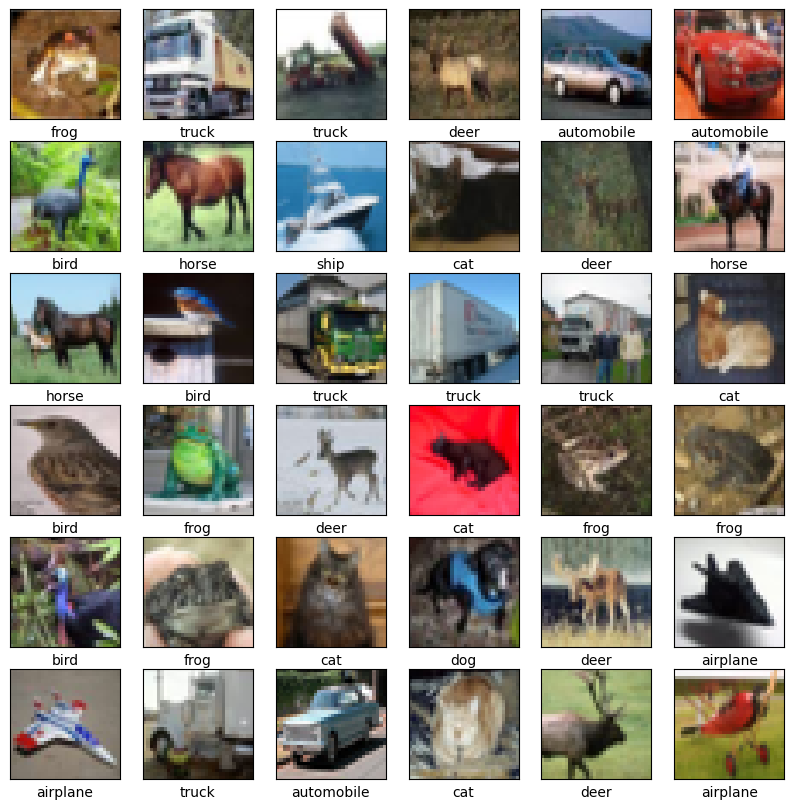

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#menampilkan data cifar10 sebanyak 36 data
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Arsitektur CNN Base

In [5]:
#membangun arsitektur CNN dengan 2 layer konvolusi
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        #Layer konvolusi 1
        # input_shape=(32,32,3) artinya adalah data input yang digunakan 32x32 pixel dengan saluran 3 warna (RGB)
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(32,32,3)),
        #Pendefenisian Max pooling 1
        # MaxPool2D ini digunakan untuk memecah pixel menjadi lebih kecil dengan ukuran 2x2 pixel sehingga akan menurunkan resolusi gambar
        # dan angka terbesar yang akan diambil
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # Layer konvolusi 2
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.nn.relu),
        #Pendefenisian Max pooling 2
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # ini adalah teknik regulasi untuk mengurangi overfitting dengan mengatur beberapa neuron secara acak selama pelatihan. Dalam hal ini, 50% neuron
        # akan di-drop selama pelatihan.
        tf.keras.layers.Dropout(0.5),

        # mendefenisikan dense layer dengan melakukan aktivasi fugsi RelU
        # mengubah input multi-dimensi menjadi vektor satu dimensi sebelum memasukkannya ke dalam Dense layer (fully connected)
        tf.keras.layers.Flatten(),
        # layer fully connected dengan 128 neuron.
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # output dengan melakukan aktifasi fungsi softmax
        # layer fully connected dengan 10 neuron, sesuai dengan jumlah kelas yang ingin diprediksi (misalnya, CIFAR-10 memiliki 10 kelas).
        # Fungsi aktivasi Softmax digunakan untuk menghasilkan probabilitas untuk setiap kelas.
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
#inisialisasi model dengan melewatkan data kedalam parameter fungsi
cnn_model.predict(train_images[[0]])
# sumary layer dari model yang didefenisikan
print(cnn_model.summary())

1/1 [==============================] - 2s 2s/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 6, 6, 128)         0         
                                                                 
 flatt

In [7]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
# penyimpanan weight dari model sebelumnya berguna untuk:
# 1. Melanjutkan pelatihan:
# Jika pelatihan model dihentikan (misalnya, karena kegagalan sistem atau pemadaman listrik), Anda dapat melanjutkan
# pelatihan dari checkpoint yang terakhir disimpan tanpa harus memulai ulang dari awal. Ini menghemat waktu dan sumber daya.
# 2. Pemulihan model:
# Jika Anda menemukan bahwa model yang dilatih pada beberapa epoch tertentu memberikan hasil terbaik, Anda dapat
# memulihkan bobot dari checkpoint tersebut untuk digunakan dalam inferensi atau pelatihan lebih lanjut.
# 3. Checkpoint secara berkala
# Dengan menggunakan callback ModelCheckpoint, Anda dapat menyimpan bobot model secara berkala (misalnya, setelah setiap epoch).
# Ini berguna untuk melacak kemajuan pelatihan dan memiliki backup terbaru dari model Anda.
#
# Weight: digunakan untuk mengatur posisi kiri kanan atau tingkat kemiringan dari garis (mungkin seperti regresi linear yang tegak lurus, namun
# dapat dimiringkan dengan nilai weight ini)
# Bias: digunakan untuk mengatur flexible si garis tersebut, misalkan dari atas kebawah sehingga garis nya tidak kaku tegak lurus seperti regresi linear.
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [8]:
#melakukan compile dengan menggunakan SGD optimizer dan learning rate=0.001 dan losses sparse_categorical_crossentropy
# - optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
# Optimizer: Adalah algoritma yang digunakan untuk mengubah atribut-atribut model seperti bobot dan bias untuk mengurangi kerugian (loss) model.
# Adam Optimizer: Adam (Adaptive Moment Estimation) adalah salah satu optimizer yang paling populer karena menggabungkan kelebihan dari dua optimizers lainnya yaitu
# AdaGrad dan RMSProp. Adam menggunakan estimasi rata-rata dari momen pertama (rata-rata) dan kedua (variasi) dari gradien untuk melakukan pembaruan bobot.
# learning_rate=0.001: Learning rate adalah parameter yang menentukan seberapa besar perubahan yang akan dilakukan pada bobot model pada setiap iterasi. Nilai 0.001
# adalah nilai yang umum digunakan dan dianggap cukup baik untuk banyak kasus.
# - loss='sparse_categorical_crossentropy'
# Loss function: Fungsi kerugian adalah metrik yang digunakan untuk mengukur seberapa baik model memprediksi target yang diinginkan. Tujuannya adalah untuk meminimalkan
# nilai dari fungsi kerugian ini selama pelatihan.
# sparse_categorical_crossentropy: ini adalah jenis loss function yang cocok untuk klasifikasi multi-kelas dimana label target adalah integer. Fungsi ini menghitung
# antara label integer dan output softmax dari model. Berbeda dengan `categorical_crossentropy` yang mengharuskan label dalam bentuk one-hot encoded, `sparse_categorical_crossentropy`
# bekerja langsung dengan label integer.
# - metrics=['accuracy']
# Metrics: metrik adalah parameter yang digunakan utnuk mengevaluasi performa model selama pelatihan dan pengujian. Ini tidak digunakan oleh optimizer untuk pelatihan model, tetapi berguna
# untuk memahami kinerja model
# accuracy: Akurasi adalah salah satu metrik yang paling umum digunakan untuk masalah klasifikasi. Ini mengukur persentase prediksi yang benar dari total prediksi. Akurasi dihitung
# sebagai rasio dari jumlah predksi benar terhadap jumlah prediksi total.
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Batch: Ini adalah ukuran batch yang menentukan jumlah sampel yang akan diproses sebelum model diperbarui. Dalam hal ini, 64 sampel akan diproses sekaligus sebelum
# model diperbarui. Dalam hal ini, 64 sampel akan diproses sekaligus sebelum pembaruan bobot dilakukan.
# Menggunakan ukuran batch dari 64 berarti bahwa setiap kali model diperbarui, ia akan menggunakan 64 sampel dari dataset pelatiham. Ini memungkinkan penggunaan memori
# yang lebih efisien dan stabilitas pelatihan yang lebih baik dibandingkan menggunakan seluruh dataset sekaligus (yang disebut pelatihan dalam model batch penuh).
BATCH_SIZE = 64
# Epoch: Jumlah epoch adalah jumlah kali seluruh dataset akan dilalui selama pelatihan. Dalam hal ini, dataset pelatihan akan dilalu 50 kali.
# Mengatur jumlah epoch ke 50 berarti bahwa model akan melihat seluruh dataset pelatihan sebanyak 50 kali. Semakin banyak epoch, semakin banyak waktu yang dihabiskan model
# untuk belajar dari data, yang dapat meningkatkan akurasi, tetapi juga meningkatkan risiko overfitting jika model dilatih terlalu lama.
EPOCHS = 50

# model.fit melakukan training terhadap model, dengan jumlah batch 128 dan epoch 20
# validation_data: adalah dataset yang digunakan untuk validasi model di akhir setiap epoch. Ini membantu untuk memantau kinerja model pada data yang tidak terlihat selama pelatihan.
# callback: adalaha daftar callback yang digunakan selama pelatihan. Dalam hal ini, `cp_callback` adalah callback untuk menyimpan bobot model
# Callback ini menyimpan bobot model setelah setiap epoch atau sesuai dengan aturan yang ditentukan. Ini sangat berguna untuk menyimpan checkpoint sehingga Anda dapat melanjutkan
# pelatihan atau memulihkan model dari titik tertentu jika terjadi kesalahan.
hasil=cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_data=(test_images, test_labels),callbacks=[cp_callback])

# output dari hasil model ini terdapat 2, yaitu:
# 1. Training Metrics (loss and accuracy)
# Ini menunjukkan seberapa baik model mempelajari data pelatihan. Metrik ini digunakan untuk mengukur kinerja model pada data yang digunakan untuk melatihnya.
# 2. Validation Metrics (val_loss and val_accuracy)
# Ini menunjukkan seberapa baik model mempelajari generalisasi dari data pelatihan ke data baru yang tidak terlihat selama pelatihan. Metrik ini digunakan untuk mengukur kinerja model pada data validasi,
# yang membantu dalam memnatau dan mencegah overfitting.


Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 1.5055 - accuracy: 0.4589
Epoch 1: saving model to training_1/cp.ckpt
782/782 [==============================] - 10s 8ms/step - loss: 1.5055 - accuracy: 0.4589 - val_loss: 1.2639 - val_accuracy: 0.5545
Epoch 2/50
776/782 [============================>.] - ETA: 0s - loss: 1.1830 - accuracy: 0.5796
Epoch 2: saving model to training_1/cp.ckpt
782/782 [==============================] - 5s 7ms/step - loss: 1.1829 - accuracy: 0.5797 - val_loss: 1.0412 - val_accuracy: 0.6372
Epoch 3/50
782/782 [==============================] - ETA: 0s - loss: 1.0533 - accuracy: 0.6316
Epoch 3: saving model to training_1/cp.ckpt
782/782 [==============================] - 5s 6ms/step - loss: 1.0533 - accuracy: 0.6316 - val_loss: 0.9717 - val_accuracy: 0.6633
Epoch 4/50
781/782 [============================>.] - ETA: 0s - loss: 0.9658 - accuracy: 0.6614
Epoch 4: saving model to training_1/cp.ckpt
782/782 [==============================] - 5s 

In [10]:
# Pada tahap ini digunakan untuk mengevaluasi performa model pada dataset pengujian setelah model selesai dilatih.

#menerapkan model kedalam data test
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8688 - accuracy: 0.7582
Test accuracy: 0.7581999897956848


313/313 - 1s - loss: 0.8688 - accuracy: 0.7582 - 691ms/epoch - 2ms/step


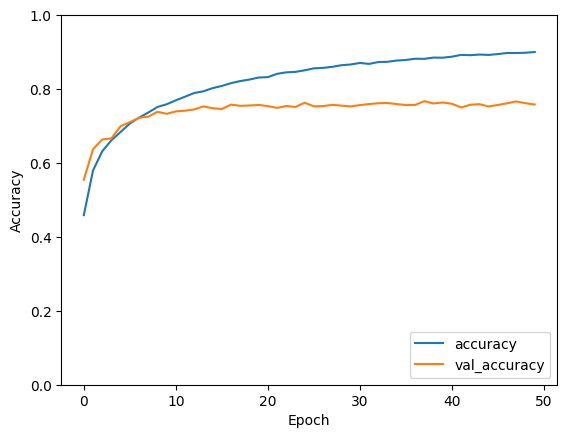

In [11]:
# Kode berikut digunakan untuk menvisualisasikan hasil pelatihan model dengan menggambar grafik akurasi dari data pelatihan dan validasi terhadap jumlah epoch.
# Selain itu, kode ini juga mengevaluasi model pada data pengujian dan mencetak hasilnya.

#Visualisasi hasil evaluasi model
plt.plot(hasil.history['accuracy'], label='accuracy')
plt.plot(hasil.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Menetapkan batas sumbu-y dari 0 hingga 1 untuk akurasi, karena akurasi adalah nilai persentase yang berada dalam rentang ini.
plt.ylim([0, 1])
# Menambahkan legend ke plot, dengan posisi di sudut kanan bawah, Legenda membantu membedakan antara akurasi pelatihan dan validasi.
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)


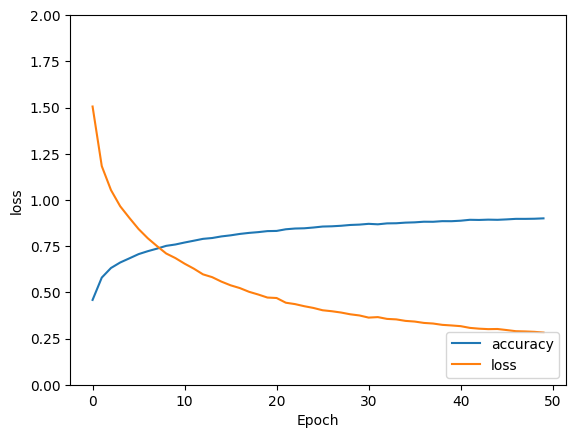

In [12]:
plt.plot(hasil.history['accuracy'], label='accuracy')
plt.plot(hasil.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')